<a href="https://colab.research.google.com/github/Muhammad-Haris-coding/1st-code/blob/main/endToEndToyDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import pandas as pd
import numpy as np

In [90]:
df=pd.read_csv('/content/placement.csv')

In [91]:
df.head()

,CGPA,IQ,Placement
0,2.75,142,No
1,3.90,131,Yes
2,3.46,83,No
3,3.20,102,No
4,2.31,94,No


In [92]:
df['Placement']=df['Placement'].replace({'Yes':1 , 'No':0})

/tmp/ipython-input-3927409749.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Placement']=df['Placement'].replace({'Yes':1 , 'No':0})


In [93]:
df.head()

,CGPA,IQ,Placement
0,2.75,142,0
1,3.90,131,1
2,3.46,83,0
3,3.20,102,0
4,2.31,94,0


In [94]:
import matplotlib.pyplot as plt



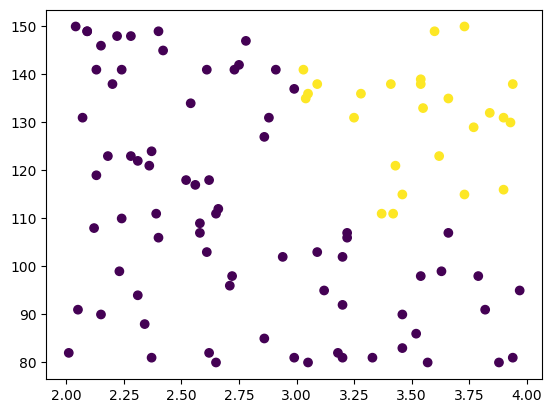

In [95]:
plt.scatter(df['CGPA'], df['IQ'], c=df['Placement'])

In [96]:
X=df.iloc[:,:2]

In [97]:
X

,CGPA,IQ
0,2.75,142
1,3.90,131
2,3.46,83
3,3.20,102
4,2.31,94
...,...,...
95,2.99,81
96,3.05,80
97,2.86,127
98,2.05,91


In [98]:
Y=df.iloc[:,-1]
Y

,Placement
0,0
1,1
2,0
3,0
4,0
...,...
95,0
96,0
97,0
98,0


In [99]:
from sklearn.model_selection import train_test_split

In [100]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.1)

In [101]:
x_train

,CGPA,IQ
73,3.63,99
62,3.66,135
60,2.78,147
45,3.33,81
76,3.54,98
...,...,...
86,3.46,90
54,3.20,81
47,3.04,135
84,2.62,118


In [102]:
x_test

,CGPA,IQ
69,3.97,95
20,3.22,107
66,2.28,148
48,3.09,138
25,3.57,80
87,3.28,136
8,3.20,92
2,3.46,83
22,2.58,109
24,2.91,141


In [103]:
y_train

,Placement
73,0
62,1
60,0
45,0
76,0
...,...
86,0
54,0
47,1
84,0


In [104]:
from sklearn.preprocessing import StandardScaler

In [105]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [106]:
x_train

array([[ 1.18958712, -0.77446433],
       [ 1.23958534,  0.85917136],
       [-0.22702892,  1.40371659],
       [ 0.68960499, -1.59128217],
       [ 1.03959248, -0.81984309],
       [ 1.63957104, -0.00302525],
       [-0.96033605, -1.27363079],
       [-0.06036821,  0.67765629],
       [-0.92700391,  0.22386859],
       [-1.41031998,  0.67765629],
       [-0.32702535, -0.81984309],
       [-1.06033248,  0.31462613],
       [ 1.17292105,  0.31462613],
       [ 0.90626391, -0.04840402],
       [ 0.8562657 ,  0.22386859],
       [ 1.23958534, -0.41143417],
       [ 0.50627821, -0.45681294],
       [-0.51035213, -0.59294925],
       [-1.22699319,  0.31462613],
       [-1.12699677,  1.13144398],
       [-0.86033963,  1.49447413],
       [-0.66034677,  0.08773229],
       [-0.44368785, -0.2299191 ],
       [-0.09370036, -1.40976709],
       [ 0.18962285,  1.13144398],
       [-1.14366284, -0.77446433],
       [ 1.35624783, -0.04840402],
       [-1.31032355,  0.13311106],
       [ 0.28961928,

In [107]:
x_test

array([[ 1.75623354, -0.9559794 ],
       [ 0.50627821, -0.41143417],
       [-1.06033248,  1.44909536],
       [ 0.28961928,  0.99530767],
       [ 1.0895907 , -1.63666094],
       [ 0.60627463,  0.90455013],
       [ 0.47294606, -1.09211571],
       [ 0.90626391, -1.50052463],
       [-0.56035035, -0.32067663],
       [-0.01037   ,  1.13144398]])

In [108]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [109]:
y_pred=lg.predict(x_test)

In [110]:
y_test

,Placement
69,0
20,0
66,0
48,1
25,0
87,1
8,0
2,0
22,0
24,0


In [111]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9

In [113]:
import pickle as pkl
pkl.dump(lg,open('ToymodelFile.pkl ','wb'))